In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Lecture7.logistic_regression import SimpleLogisticRegression

In [158]:
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load and process dataset
load breast_cancer.csv, drop columns "id" and "Unnamed: 32", investigate the dataset, and divide into train and test with 80/20 ratio, map values of "diagnosis" from ("B","M") to (0,1)

In [159]:
original_data = pd.read_csv('breast_cancer.csv')
X = original_data.drop(['id', 'Unnamed: 32'], axis=1)
target_col = 'diagnosis'
X.loc[X[target_col] == 'M', 'diagnosis'] = 1
X.loc[X[target_col] == 'B', 'diagnosis'] = 0
X[target_col] = X[target_col].astype(int)

setting number of clusters

In [160]:
K = 2

We have two very strong outliers, which in future will make serious influence on algorithm and sometimes stick one cluster center and dont let to it to be changed
These are rows 212 and 461
We should delete them

In [161]:
X.drop(212, axis=0, inplace=True)
X.drop(461, axis=0, inplace=True)

In [162]:
print('CORRELATION MATRIX:')
for feature in X.columns.difference([target_col]):
    print(f'Correlation between {feature} and target column: ', X[[feature, target_col]].corr().iloc[1,0])

CORRELATION MATRIX:
Correlation between area_mean and target column:  0.7230194885685689
Correlation between area_se and target column:  0.6543415456204112
Correlation between area_worst and target column:  0.7448380011989271
Correlation between compactness_mean and target column:  0.5942507555534166
Correlation between compactness_se and target column:  0.290603028749923
Correlation between compactness_worst and target column:  0.5926000675832344
Correlation between concave points_mean and target column:  0.7775205070637204
Correlation between concave points_se and target column:  0.40507334289059854
Correlation between concave points_worst and target column:  0.7930748115655999
Correlation between concavity_mean and target column:  0.6964521916907342
Correlation between concavity_se and target column:  0.24916850970137372
Correlation between concavity_worst and target column:  0.658814461765053
Correlation between fractal_dimension_mean and target column:  -0.008297389429912686
Corre

In [163]:
y = X[target_col]
X.drop(target_col, axis=1, inplace=True)

In [164]:
print('Number of malignant diagnosis: ', y.value_counts().loc[0])
print('Number of benign diagnosis: ', y.value_counts().loc[1])

Number of malignant diagnosis:  357
Number of benign diagnosis:  210


In [165]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,14.079187,19.278783,91.631358,648.380776,0.096308,0.104091,0.087907,0.048513,0.181147,0.062823,0.397042,1.216239,2.804511,38.596116,0.007029,0.025424,0.031751,0.011767,0.020500,0.003792,16.213437,25.679894,106.864074,871.779189,0.132395,0.254144,0.271379,0.114266,0.290342,0.084013
std,3.435530,4.298475,23.664895,334.976006,0.014060,0.052719,0.078416,0.038259,0.027434,0.007060,0.241336,0.552502,1.735771,34.823434,0.002996,0.017900,0.030140,0.006152,0.008200,0.002650,4.743557,6.144992,32.934746,548.180273,0.022860,0.157390,0.208266,0.065526,0.061742,0.018048
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.695000,16.170000,75.100000,420.050000,0.086210,0.064710,0.029520,0.020310,0.161900,0.057800,0.232350,0.832400,1.604000,17.850000,0.005163,0.013015,0.015035,0.007631,0.015095,0.002241,13.010000,21.090000,84.095000,514.650000,0.116600,0.146600,0.114450,0.064530,0.250450,0.071465
50%,13.340000,18.840000,86.180000,546.400000,0.095860,0.092420,0.061260,0.033410,0.179200,0.061550,0.323700,1.108000,2.284000,24.440000,0.006369,0.020420,0.025860,0.010910,0.018730,0.003136,14.960000,25.410000,97.650000,684.600000,0.131300,0.211900,0.226400,0.099750,0.282300,0.080060
75%,15.765000,21.790000,103.750000,781.800000,0.105200,0.130350,0.128250,0.073520,0.195650,0.066135,0.475950,1.473500,3.321000,44.935000,0.008135,0.032295,0.041615,0.014710,0.023425,0.004537,18.655000,29.690000,125.050000,1060.000000,0.146050,0.338100,0.381900,0.161350,0.318150,0.092085
max,27.220000,39.280000,182.100000,2250.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.509000,4.885000,11.070000,233.000000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [166]:
X.mean()

radius_mean                 14.079187
texture_mean                19.278783
perimeter_mean              91.631358
area_mean                  648.380776
smoothness_mean              0.096308
compactness_mean             0.104091
concavity_mean               0.087907
concave points_mean          0.048513
symmetry_mean                0.181147
fractal_dimension_mean       0.062823
radius_se                    0.397042
texture_se                   1.216239
perimeter_se                 2.804511
area_se                     38.596116
smoothness_se                0.007029
compactness_se               0.025424
concavity_se                 0.031751
concave points_se            0.011767
symmetry_se                  0.020500
fractal_dimension_se         0.003792
radius_worst                16.213437
texture_worst               25.679894
perimeter_worst            106.864074
area_worst                 871.779189
smoothness_worst             0.132395
compactness_worst            0.254144
concavity_wo

finding feature which should be rescaled

In [167]:
X_max = X.max()
features_to_rescale = X_max[np.abs(X.max()) > 2].index.tolist()
X[features_to_rescale] = StandardScaler().fit_transform(X[features_to_rescale])


## Implementing KMeans

In [168]:
class KMeans(object):
    def __init__(self, K, metric='L2', max_iter=200, eps=1e-4, center_init='random'):
        self.K = K
        self.max_iter = max_iter
        self.eps = eps
        self.centroids = np.array([])
        self.metric = metric.lower()
        self.center_init = center_init.lower()

        """
        if metric is 'L2' let self.dist be a function that computes euclidian distance between x and y vectors,
        if metric is 'L1' let self.dist be a function that computes manhattan distance between x and y vectors,
        otherwise raise not implemented error
        """
        if self.metric == 'l2':
            self.dist = self.l2_dist
        elif self.metric == 'l1':
            self.dist = self.l1_dist
        else:
            raise NotImplementedError

    def __str__(self):
        return f'KMeans object: metric={self.metric}, center_init={self.center_init}, K={self.K}, max_iter={self.max_iter}, eps={self.eps}'

    def distortion(self, X, r):
        """
        param X: numpy array of shape (M,N)
        param r: numpy array of shape (M), shows to which cluster each row of X belongs
        return: distortion value of the dataset
        """
        sum_ = 0
        for k in range(self.K):
            mask = r[:, k] == 1
            X_k = X[mask]
            sum_ += np.sum(self.dist(X_k, self.centroids[k]))
        print('distortion: ', sum_)
        return sum_

    def init_centroids(self, X):
        """
        :param X: numpy array of shape (M,N)
        """
        """ 
        If centers_init is 'random' initialize self.centroids with random K items from X,
        if it is 'kmeans++' initialize centroids according to the algorithm in 
        http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf page 3,
        otherwise raise not implemented error .
        """
        if self.center_init.lower() == 'random':
            self.centroids = self.random_init(X)
        elif self.center_init.lower() == 'kmeans++':
            self.centroids = self.kmeans_plus_plus_init(X)
        else:
            raise NotImplementedError

    def fit(self, X):
        """
        :param X: numpy array of shape (M,N)
        """
        """ 
        1. Initialize cluster centers using self.init_centroids method
        2. Implement KMeans algorithm and  terminate it when either self.max_iter iterations are performed,
        or the biggest change in cluster centers is smaller than selfk means formula.eps

        The final cluster centers should be saved in self.centroids
        """
        step = 0
        self.init_centroids(X)
        r = self.recalculate_r(X)
        curr_distortion = self.distortion(X, r)

        while step <= self.max_iter:
            r = self.recalculate_r(X)
            self.recalculate_centroids(X, r)

            prev_distortion = curr_distortion
            curr_distortion = self.distortion(X, r)
            if np.abs(prev_distortion - curr_distortion) <= self.eps:
                print(f'Required precision achieved on {step}-th step')
                break

            step += 1
        else:
            print('Maximum iterations run out!')

    def recalculate_centroids(self, X, r):
        for k in range(self.K):
            mask = r[:, k] == 1
            numerator = X[mask].sum(axis=0)
            denominator = r[:, k].sum()
            self.centroids[k] = numerator / denominator

    def recalculate_r(self, X):
        num_rows, num_columns = X.shape
        r = np.zeros(shape=(num_rows, self.K), dtype=int)
        indices = self.find_closest_distances(X, self.centroids)[:, 1].astype('int')
        for i in range(len(indices)):
            r[i, indices[i]] = 1
        return r

    def predict(self, X):
        """
        :param X: numpy array of shape (M,N)
        :return: numpy array of shape (M,)
        """
        """
        using  self.centroids predict to which cluster each datapoint of X belongs, values in returned array
        are integers(id of the cluster). 
        """
        return self.find_closest_distances(X, self.centroids)[:, 1].astype('int')

    def random_init(self, X):
        # for each feature define its boundaries, i.e. minimum and maximum values
        min_boundary = X.min(axis=0)
        max_boundary = X.max(axis=0)

        # return K random vectors of size X.shape[1]
        centroids = np.random.uniform(low=min_boundary, high=max_boundary, size=(self.K, min_boundary.shape[0]))
        return centroids

    def kmeans_plus_plus_init(self, X):
        num_rows, num_columns = X.shape
        # step 1a. Take one center c1, chosen uniformly at random from X
        centroids = np.array(X[np.random.randint(num_rows)])
        centroids = centroids.reshape(-1, len(centroids))

        # step2a.  Take a new center c[i], choosing x ∈ X with probability D(x)**2/sum(D(x)**2)
        for i in range(self.K - 1):
            distances = self.find_closest_distances(X, centroids)[:, 0]
            probabilities = self.get_probabilities(distances)
            max_proba_index = np.argwhere(probabilities == np.amax(probabilities))[0][0]

            # reshape 1d to 2d for appending
            new_centroid = X[max_proba_index].reshape(-1, len(X[max_proba_index]))
            centroids = np.append(centroids, new_centroid, axis=0)
        return centroids

    def get_probabilities(self, distances):
        squared = distances ** 2
        sum_ = np.sum(squared)
        return squared / sum_

    def find_closest_distances(self, X, centroids):
        '''
        :param X:
        :param centroids:
        :return: an array where i-th row is associated with i-th row in X
                 and has two elements: closest distance to centroid and index of that centroid
        '''

        num_rows = X.shape[0]
        closest_distances = np.zeros(shape=(num_rows, 2))

        for i in range(num_rows):
            # array of distances between current point and centroids
            distances = self.dist(centroids, X[i])
            # index of min element in distances assigned to indices array
            min_distance = np.amin(distances)
            closest_distances[i] = min_distance, np.argwhere(distances == min_distance)
        return closest_distances

    def l2_dist(self, X, Y):
        return np.sqrt(np.sum((X - Y) ** 2, axis=1))

    def l1_dist(self, X, Y):
        return np.sum(np.abs(X - Y), axis=1)
    
    

## Cluster the dataset with kmeans, model and predict malignancy of tumors in the test set entries
## 1. Perform clustering using the following hyperparameter pairs
1. metric='L1', center_init='random'
2. metric='L1', center_init='kmeans++'
3. metric='L2', center_init='random'
4. metric='L2', center_init='kmeans++'

## 2. Predict malignancy of tumors in the test set entries using all 4 models trained above, compare their performances.


In [169]:
clf1 = KMeans(K=2, metric='L1', center_init='random')
clf2 = KMeans(K=2, metric='L1', center_init='kmeans++')
clf3 = KMeans(K=2, metric='L2', center_init='random')
clf4 = KMeans(K=2, metric='L2', center_init='kmeans++', eps=1e-05)

In [170]:
print(clf1)
clf1.fit(X.values)
clusters = clf1.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy_score: ', accuracy_score(y, labels))

KMeans object: metric=l1, center_init=random, K=2, max_iter=200, eps=0.0001
distortion:  9993.775916204038
distortion:  3932.0463978393077
distortion:  3669.437217503957
distortion:  3623.9856573586408
distortion:  3609.849667319035
distortion:  3598.13723774101
distortion:  3596.1051262594005
distortion:  3596.1051262594005
Required precision achieved on 6-th step
accuracy_score:  0.8589065255731922


In [171]:
print(clf2)
clf2.fit(X.values)
clusters = clf2.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy score: ', accuracy_score(y, labels))

KMeans object: metric=l1, center_init=kmeans++, K=2, max_iter=200, eps=0.0001
distortion:  5883.7012750941485
distortion:  3991.384525922852
distortion:  3688.6600627712974
distortion:  3633.6072439600593
distortion:  3612.413435569223
distortion:  3598.13723774101
distortion:  3596.1051262594005
distortion:  3596.1051262594005
Required precision achieved on 6-th step
accuracy score:  0.8589065255731922


In [172]:
print(clf3)
clf3.fit(X.values)
clusters = clf3.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy score: ', accuracy_score(y, labels))

KMeans object: metric=l2, center_init=random, K=2, max_iter=200, eps=0.0001
distortion:  5166.930106936862
distortion:  1571.916459734046
distortion:  1230.6520965945163
distortion:  1211.5038421947693
distortion:  1208.1297319933583
distortion:  1207.112040091141
distortion:  1207.112040091141
Required precision achieved on 5-th step
accuracy score:  0.8624338624338624


In [173]:
print(clf4)
clf4.fit(X.values)
clusters = clf4.predict(X.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]
print(f'accuracy score: ', accuracy_score(y, labels))

KMeans object: metric=l2, center_init=kmeans++, K=2, max_iter=200, eps=1e-05
distortion:  1932.7662200144748
distortion:  1445.4088255191068
distortion:  1265.5995738256483
distortion:  1226.6928262352621
distortion:  1212.0091723412086
distortion:  1208.7319047345666
distortion:  1207.112040091141
distortion:  1207.112040091141
Required precision achieved on 6-th step
accuracy score:  0.8624338624338624


## Fit your implementation of Logistic Regression on the dataset, predict on test set and compare the results with kmeans approach

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
my_LR = SimpleLogisticRegression(threshold=0.5, lambda_=10, epsilon=1e-5, learning_rate=1e-3, max_steps=500_000)
my_LR.fit(X_train.values, y_train.values)

X_test_array = np.insert(X_test.values, 0, 1, axis=1)

LR_y_pred = my_LR.predict(X_test_array)

step: 1000    error: 1.5720086125948
step: 2000    error: 0.8017001613748107
step: 3000    error: 0.408889390520244
step: 4000    error: 0.20855256102277053
step: 5000    error: 0.10613221798638506
step: 6000    error: 0.05358973488665697
step: 7000    error: 0.02653777551638825
step: 8000    error: 0.012547505824414884
step: 9000    error: 0.00526544592190703
step: 10000    error: 0.0014443850970025096
Gradient Descent converged at 10641-th step


In [175]:
sklearn_LR = LogisticRegression()
sklearn_LR.fit(X_train, y_train)
sklearn_y_pred = sklearn_LR.predict(X_test)

## Analyze the coefficients of fitted logistic regression model, drop 2 most unimportant features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results

In [176]:
coefficients = my_LR.get_beta()[1:]
coefficients.shape

(30,)

In [177]:
arr = np.abs(coefficients)
sorted_ = np.sort(arr)
first_to_drop = np.argwhere(arr == sorted_[0])[0][0]
second_to_drop = np.argwhere(arr == sorted_[1])[0][0]

In [178]:
X_train1 = X_train.drop(X_train.columns[[first_to_drop, second_to_drop]], axis=1)
X_test1 = X_test.drop(X_test.columns[[first_to_drop, second_to_drop]], axis=1)

In [179]:
my_LR.fit(X_train1.values, y_train.values)
X_test_array1 = np.insert(X_test1.values, 0, 1, axis=1)
LR_y_pred1 = my_LR.predict(X_test_array1)

step: 1000    error: 1.3955115616613512
step: 2000    error: 0.6800779421650986
step: 3000    error: 0.332636872570788
step: 4000    error: 0.1636239839025393
step: 5000    error: 0.08080331125756857
step: 6000    error: 0.03978893686360152
step: 7000    error: 0.01923100984494397
step: 8000    error: 0.008776946600548285
step: 9000    error: 0.003366798243760627
step: 10000    error: 0.0005134497449716946
Gradient Descent converged at 10267-th step


In [180]:
clf3.fit(X_train1.values)
clusters = clf3.predict(X_train1.values)

labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

distortion:  2992.3801046037843
distortion:  1150.957757650025
distortion:  1000.8966996916129
distortion:  975.878535056224
distortion:  967.3177221355172
distortion:  964.8879981557566
distortion:  962.0493163782857
distortion:  962.0493163782857
Required precision achieved on 6-th step


In [181]:
print('Accuracy of my Logistic Regression: ', accuracy_score(y_test, LR_y_pred))
print('Accuracy of my Logistic Regression with dropped 2 unimportant features: ', accuracy_score(y_test, LR_y_pred1))
print('Accuracy of Sklearn Logistic Regressor: ', accuracy_score(y_test, sklearn_y_pred))
print(f'Accuracy of my KMeans: ', accuracy_score(y_train, labels))

Accuracy of my Logistic Regression:  0.9298245614035088
Accuracy of my Logistic Regression with dropped 2 unimportant features:  0.9298245614035088
Accuracy of Sklearn Logistic Regressor:  0.9649122807017544
Accuracy of my KMeans:  0.869757174392936


## Analyze the coefficients of fitted initial logistic regression model(using all features), select two most important features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results, make the following plot using the test set:

datapoints with cluster centers and decision boundary, color the datapoints according to Kmeans predictions
color the datapoints on which predictions of logistic regression and Kmeans disagree with separate color


In [182]:
coefficients = my_LR.get_beta()[1:]
coefficients

array([ 0.21352136,  0.12848061,  0.22765204,  0.21361558,  0.00786364,
        0.01843411,  0.03143633,  0.02758228,  0.0123577 , -0.01746768,
       -0.00888881,  0.21837136,  0.21872321,  0.02406848,  0.02243293,
        0.02219785,  0.02404126,  0.02126204,  0.02487452,  0.26336726,
        0.19551432,  0.27281203,  0.24932439,  0.02351173,  0.0381819 ,
        0.02515495, -0.02013194,  0.01204165])

In [183]:
arr = np.abs(coefficients)
sorted_ = np.sort(arr)
most_important1 = np.argwhere(arr == sorted_[-1])[0][0]
most_important2 = np.argwhere(arr == sorted_[-2])[0][0]
most_important1, most_important2

(21, 19)

In [184]:
# X_train_new = X_train[[X_train.columns[[most_important1, most_important2]]]]
columns = X_train.columns[[most_important1, most_important2]]
X_train2 = X_train[columns]
X_test2 = X_test[columns]

In [185]:
my_LR2 = SimpleLogisticRegression(threshold=0.5, lambda_=10, epsilon=1e-5, learning_rate=1e-3, max_steps=500_000)
my_LR2.fit(X_train2.values, y_train.values)
X_test_array2 = np.insert(X_test2.values, 0, 1, axis=1)
my_y_pred2 = my_LR2.predict(X_test_array2)

step: 1000    error: 0.004072050259665616
step: 2000    error: 0.00198238496049008
step: 3000    error: 0.0007957775612938978
step: 4000    error: 0.00015873936683963308
Gradient Descent converged at 4381-th step


In [186]:
sklearn_LR2 = LogisticRegression()
sklearn_LR2.fit(X_train2, y_train)
sklearn_y_pred2 = sklearn_LR2.predict(X_test2)

In [187]:
clf3.fit(X_train2.values)
clusters2 = clf3.predict(X_train2.values)

labels2 = np.zeros_like(clusters2)
for i in range(2):
    mask = (clusters2 == i)
    labels2[mask] = mode(y_train[mask])[0]

distortion:  536.5058335812673
distortion:  221.25541563543658
distortion:  221.43909873391598
distortion:  221.63794106460017
distortion:  221.82901309251014
distortion:  221.9387165315079
distortion:  221.9387165315079
Required precision achieved on 5-th step


In [188]:
print('Accuracy of my Logistic Regression with 2 most important features: ', accuracy_score(y_test, my_y_pred2))
print('Accuracy of Sklearn Logistic Regressor with 2 most important features: ', accuracy_score(y_test, sklearn_y_pred2))
print(f'Accuracy of my KMeans with 2 most important features: ', accuracy_score(y_train, labels2))

Accuracy of my Logistic Regression with 2 most important features:  0.7280701754385965
Accuracy of Sklearn Logistic Regressor with 2 most important features:  0.7280701754385965
Accuracy of my KMeans with 2 most important features:  0.7152317880794702


In [189]:
clusters_test = clf3.predict(X_test2.values)

labels_test = np.zeros_like(clusters_test)
for i in range(2):
    mask = (clusters_test == i)
    labels_test[mask] = mode(y_test[mask])[0]

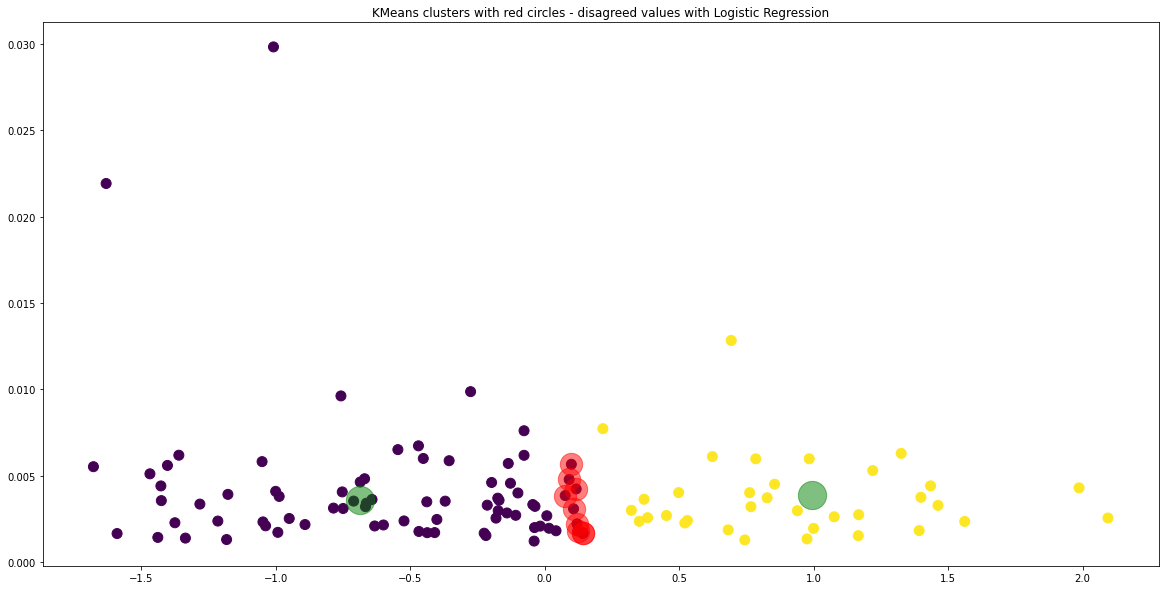

In [190]:
plt.figure(figsize=(20,10))
plt.scatter(X_test2.values[:, 0], X_test2.values[:, 1], c=labels_test, s=100, cmap='viridis')

mask_ = labels_test != my_y_pred2
disagreed_values = X_test2.values[mask_]
plt.scatter(disagreed_values[:, 0], disagreed_values[:, 1], c='red', s=500, alpha=0.5, cmap='viridis')

centers = clf3.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=800, alpha=0.5)
plt.title('KMeans clusters with red circles - disagreed values with Logistic Regression')
plt.show()

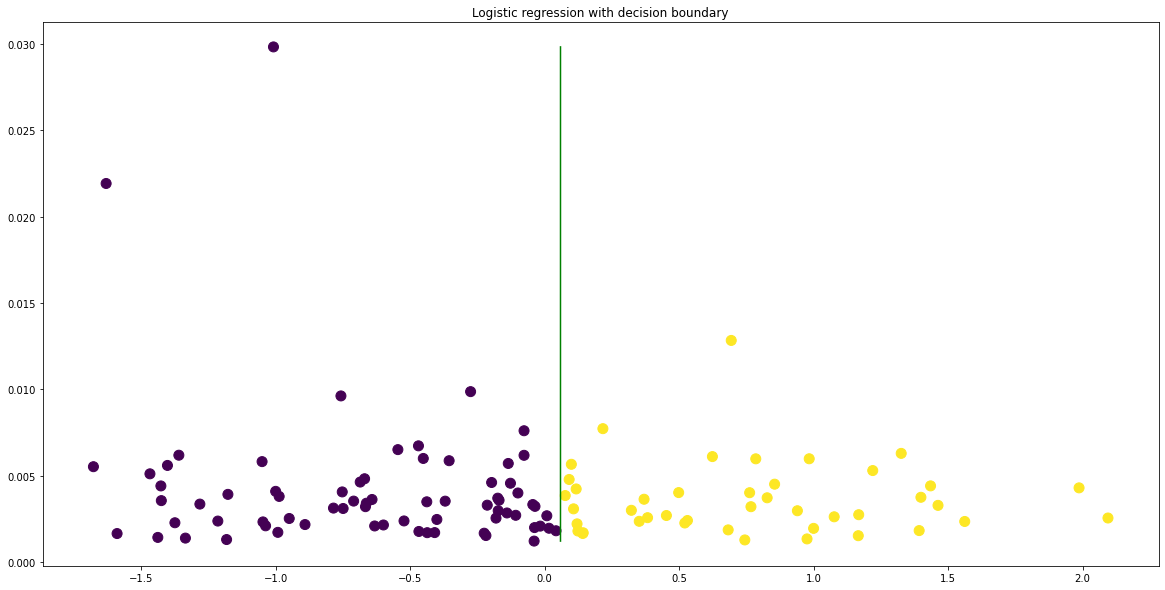

In [191]:
plt.figure(figsize=(20,10))
plt.scatter(X_test2.values[:, 0], X_test2.values[:, 1], c=my_y_pred2, s=100, cmap='viridis')
b0,b1,b2 = my_LR2.get_beta()
y = np.array([X_test2.values[:, 1].min(), X_test2.values[:, 1].max()])
# decision boundary: b0+b1*x+b2*y=0
x = -(b0+b2*y)/b1
plt.plot(x,y, c='green')
plt.title('Logistic regression with decision boundary')
plt.show()

## Compare performance of best Kmeans model with the performance of Kmeans in sklearn library, using the same hyperparameters.

In [192]:
my_kmeans = KMeans(K=2, metric='L2', center_init='kmeans++', eps=1e-05)
print(my_kmeans)
my_kmeans.fit(X_train1.values)
my_clusters = my_kmeans.predict(X_train1.values)

my_labels = np.zeros_like(my_clusters)
for i in range(K):
    mask1 = (my_clusters == i)
    my_labels[mask1] = mode(y_train[mask1])[0]

KMeans object: metric=l2, center_init=kmeans++, K=2, max_iter=200, eps=1e-05
distortion:  2045.9695537504144
distortion:  1257.463671331788
distortion:  1193.1605353807686
distortion:  1099.2096430261295
distortion:  1002.6396071806074
distortion:  967.8686362904523
distortion:  961.243786127023
distortion:  960.9813394713115
distortion:  961.4270983073873
distortion:  961.4270983073873
Required precision achieved on 8-th step


In [193]:
import sklearn.cluster
sklearn_kmeans = sklearn.cluster.KMeans(n_clusters=2, init='k-means++', max_iter=200, tol=1e-05)

sklearn_kmeans.fit(X_train1)
clusters_sklearn = sklearn_kmeans.predict(X_train1)

sklearn_labels = np.zeros_like(clusters_sklearn)
for i in range(K):
    mask2 = (clusters_sklearn == i)
    sklearn_labels[mask2] = mode(y_train[mask2])[0]

In [194]:
print(f'Accuracy of my KMeans: ', accuracy_score(y_train, my_labels))
print(f'Accuracy of Sklearn KMeans: ', accuracy_score(y_train, sklearn_labels))

Accuracy of my KMeans:  0.8741721854304636
Accuracy of Sklearn KMeans:  0.869757174392936
